In [5]:
import sys
sys.path.append('../src')

from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from group import Group
from agent import Agent
from utilities.tools import web_search

 
[2024-12-17 16:14:36][INFO]: All agents are fully connected
 
[2024-12-17 16:14:36][INFO]: Group initialized with ID f8ccda53-2288-45f9-8d6b-6558fcb24513


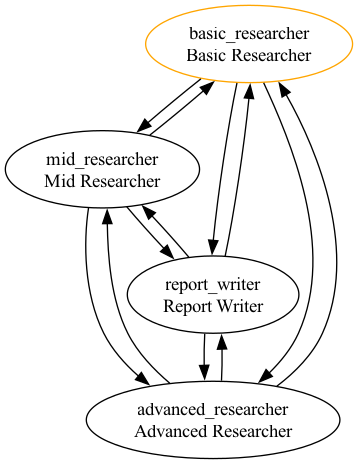

In [10]:
from utilities.tools import web_search
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are a group of researchers working on a project. Now is December 2024",
    members=[
        Agent(name="basic_researcher",
                role="Basic Researcher",
                description="Transfer to me if you need help with basic research.",
                persona="You are a basic researcher who can do basic research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="mid_researcher",
                role="Mid Researcher",
                description="Transfer to me if you have done some basic research and need help with mid-level research.",
                persona="You are a mid-level researcher who can do mid-level research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="advanced_researcher",
                role="Advanced Researcher",
                description="Transfer to me if you have done some mid-level research and need help with advanced research.",
                persona="You are an advanced researcher who can do advanced research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="report_writer",
                  role="Report Writer",
                  description="Transfer to me if you need help with writing reports.",
                  persona="You are a report writer who can write reports on any topic.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [11]:
_ = g.task("write a report about LLM multi-agent systems.",
           model="gpt-4o-mini",
           model_for_planning = "gpt-4o-mini",
           strategy="auto")

 
[2024-12-17 16:15:35][INFO]: Group Planner initialized (used for planning and managing group tasks)
 
[2024-12-17 16:15:35][INFO]: Start planning the task
 
[2024-12-17 16:15:38][INFO]: Planning finished
 
[2024-12-17 16:15:38][INFO]: Task: write a report about LLM multi-agent systems.

Plan:
Step 1: basic_researcher
Conduct initial web search on the concept of LLM multi-agent systems and gather recent articles and papers.
receive information from: []


Step 2: mid_researcher
Summarize findings from the basic research on LLM multi-agent systems, highlighting key themes and recent advancements.
receive information from: ['basic_researcher']


Step 3: advanced_researcher
Analyze the summarized findings to identify significant trends and challenges in LLM multi-agent systems.
receive information from: ['mid_researcher']


Step 4: report_writer
Compile all research findings into a comprehensive report on LLM multi-agent systems, ensuring clarity and coherence in the writing.
receive info

### More

In [8]:
# # load the environment variables
# load_dotenv()
# # create a model client
# model_client = OpenAI()
# # create an environment
# env = Env(
#     description="You are entrepreneurs building a new product. Now is December 2024",
#     members=[
#         Agent(name = "designer",
#               role = "Designer", 
#               description = "Transfer to me if you need help with design.",
#               model_client = model_client,
#               verbose = True),

#         Agent(name="engineer",
#               role="Engineer",
#               description="Transfer to me if you need help with engineering.",
#               model_client=model_client,                
#               verbose=True),

#         Agent(name="researcher",
#                 role="Researcher",
#                 description="Transfer to me if you need help with research.",
#                 model_client=model_client,
#                 tools=[web_search],
#                 verbose=True),

#       Agent(name="product_manager",
#                   role="Product Manager",
#                   description="Transfer to me if you need help with product management.",
#                   model_client=model_client,
#                   verbose=True),
#     ]
# )
# # create a group of agents
# g = Group(env=env,model_client=model_client,verbose=True)
# # Image(g.draw_relations())

In [9]:
# _ = g.task("I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?",
#            model="gpt-4o-mini",
#            model_for_planning = "gpt-4o",
#            strategy="auto")